# **Prediction on what crop to grow**


## **Importing the libraries**

In [ ]:
import pandas as pd # For data processing  
import numpy as np # For linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

## **Reading the data and getting info of it**

In [ ]:
data=pd.read_csv('Crop_recommendation.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


## **Viewing the first 5 rows of data**

In [ ]:
data.head(5)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


## **Counting the unique targeted values**

In [ ]:
data.reset_index(inplace=True, drop=True)
data['label'].value_counts()

pomegranate    100
coconut        100
grapes         100
watermelon     100
muskmelon      100
jute           100
papaya         100
coffee         100
pigeonpeas     100
kidneybeans    100
cotton         100
mango          100
orange         100
apple          100
lentil         100
blackgram      100
maize          100
mothbeans      100
chickpea       100
rice           100
banana         100
mungbean       100
Name: label, dtype: int64

## **Describing the data**

In [ ]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


#**Distribution plot for all the features**

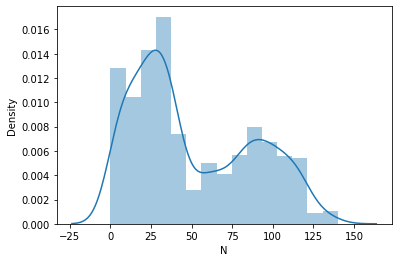

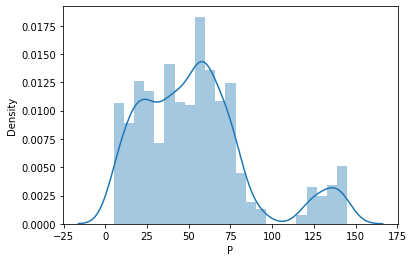

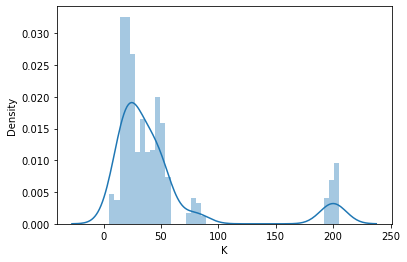

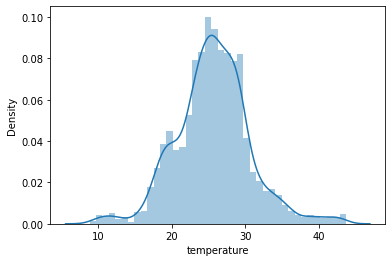

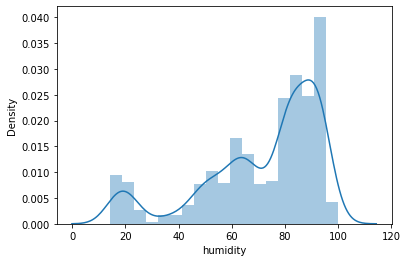

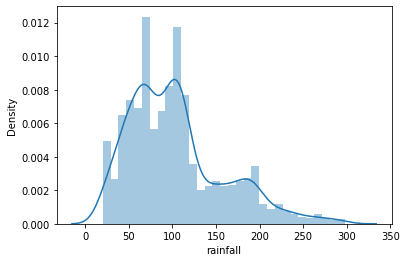

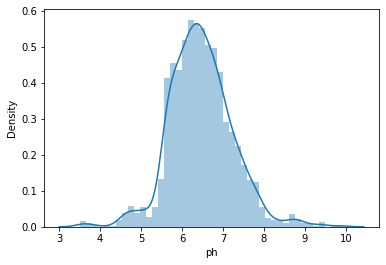

In [ ]:
sns.distplot(data.N)
plt.show()
sns.distplot(data.P)
plt.show()
sns.distplot(data.K)
plt.show()
sns.distplot(data.temperature)
plt.show()
sns.distplot(data.humidity)
plt.show()
sns.distplot(data.rainfall)
plt.show()
sns.distplot(data.ph)
plt.show()

# **Joint plot**

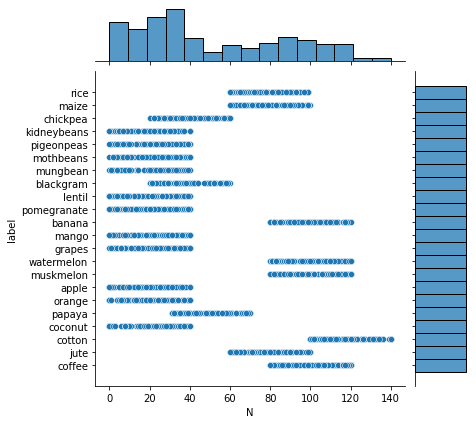

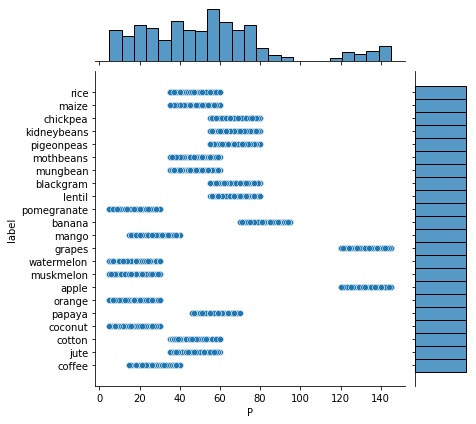

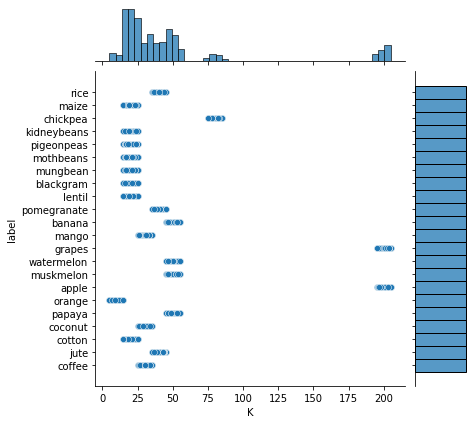

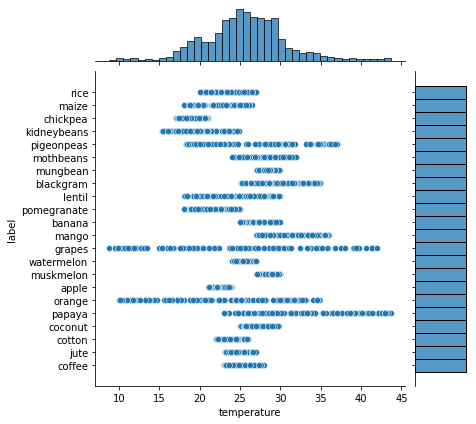

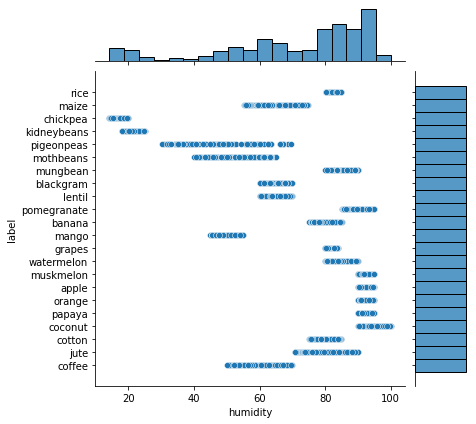

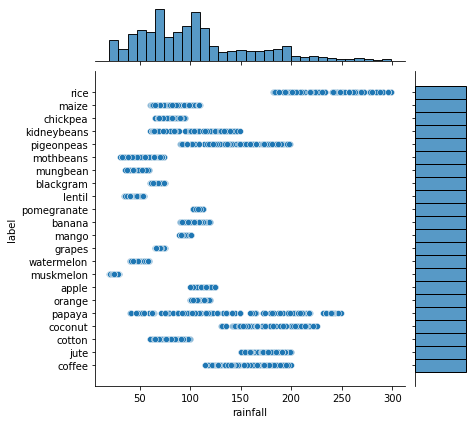

In [ ]:
sns.jointplot(data.N, data.label)
plt.show()
sns.jointplot(data.P, data.label)
plt.show()
sns.jointplot(data.K, data.label)
plt.show()
sns.jointplot(data.temperature, data.label)
plt.show()
sns.jointplot(data.humidity, data.label)
plt.show()
sns.jointplot(data.rainfall, data.label)
plt.show()

# **Pair plot for all features**

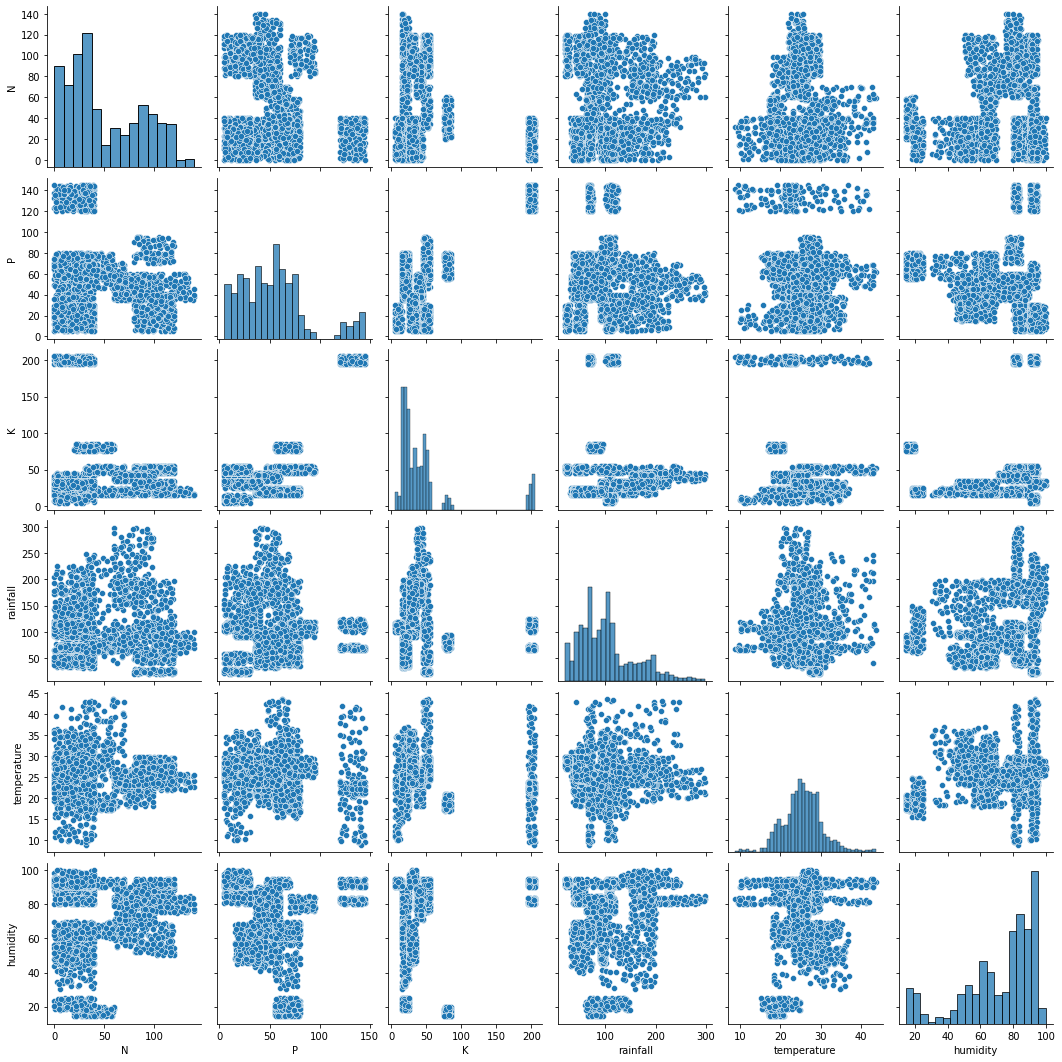

In [ ]:
sns.pairplot(data[[ 'N','P','K','rainfall','temperature','humidity', 'label']])
plt.show()

# **Generating heat map to know the corelation between features**

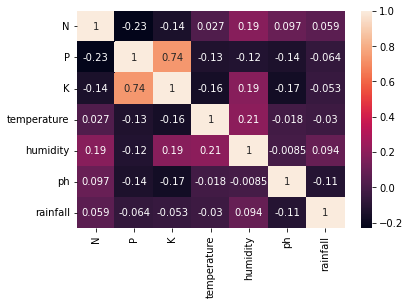

In [ ]:
sns.heatmap(data.corr(),annot=True)

# **Assigning the data**

In [ ]:
X = data.drop("label", axis=1)
Y = data["label"]

## **Splitting the data for training and testing**

In [ ]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2)

## **KNN Algorithm**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
A=knn.predict(X_test)
knn_accuracy=accuracy_score(Y_test,A)*100
Names=['knn_algorithm']
Accuracy=[knn_accuracy]
print('Classification Report')
print(classification_report(Y_test, A))
print('KNN algorithm accuracy is ', knn_accuracy)

Classification Report
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        19
      banana       1.00      1.00      1.00        15
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        15
     coconut       1.00      1.00      1.00        18
      coffee       1.00      1.00      1.00        12
      cotton       0.96      1.00      0.98        26
      grapes       1.00      1.00      1.00        26
        jute       0.90      0.90      0.90        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        19
       maize       1.00      0.96      0.98        24
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        23
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        27
     

## **SVM algorithm**

In [ ]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,Y_train)
s=svm.predict(X_test)
svm_accuracy=accuracy_score(Y_test,s)*100
Names.append('SVM_algorithm')
Accuracy.append(svm_accuracy)
print('Classification Report')
print(classification_report(Y_test,s))
print("SVM algorithm Accuracy is: ",svm_accuracy)

Classification Report
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        19
      banana       1.00      1.00      1.00        15
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        15
     coconut       1.00      1.00      1.00        18
      coffee       1.00      1.00      1.00        12
      cotton       0.93      1.00      0.96        26
      grapes       1.00      1.00      1.00        26
        jute       0.77      1.00      0.87        20
 kidneybeans       0.91      1.00      0.95        20
      lentil       0.95      1.00      0.97        19
       maize       1.00      0.92      0.96        24
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      0.96      0.98        23
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        27
     

## **NaiveBayes Algorithm**

In [ ]:
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
naive.fit(X_train,Y_train)
n=naive.predict(X_test)
naivebayes_accuracy=accuracy_score(Y_test,n)*100
Names.append('Naviebayes_algorithm')
Accuracy.append(naivebayes_accuracy)
naivebayes_accuracy
print('Classification Report')
print(classification_report(Y_test,n))
print("NavieBayes Algorithm Accuracy is: ",naivebayes_accuracy)

Classification Report
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        19
      banana       1.00      1.00      1.00        15
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        15
     coconut       1.00      1.00      1.00        18
      coffee       1.00      1.00      1.00        12
      cotton       0.96      1.00      0.98        26
      grapes       1.00      1.00      1.00        26
        jute       0.95      0.90      0.92        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        19
       maize       1.00      0.96      0.98        24
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        23
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        27
     

# **DecisionTree Algorithm**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(X_train,Y_train)
c=tree.predict(X_test)
DecisionTree_accuracy=accuracy_score(Y_test,c)*100
Names.append('DecisionTree_algorithm')
Accuracy.append(DecisionTree_accuracy)
print('Classification Report')
print(classification_report(Y_test, c))
print("DecisionTress Acuracy is ",DecisionTree_accuracy)

Classification Report
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        19
      banana       1.00      1.00      1.00        15
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        15
     coconut       1.00      1.00      1.00        18
      coffee       1.00      1.00      1.00        12
      cotton       1.00      1.00      1.00        26
      grapes       1.00      1.00      1.00        26
        jute       0.90      0.90      0.90        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        19
       maize       1.00      1.00      1.00        24
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        23
    mungbean       0.94      1.00      0.97        17
   muskmelon       0.96      1.00      0.98        23
      orange       1.00      1.00      1.00        27
     

## **Random Forest Algorithm**

In [ ]:
#Random forest classification
from sklearn.ensemble import RandomForestClassifier
random=RandomForestClassifier()
random.fit(X_train,Y_train)
r=random.predict(X_test)
RandomForest_accuracy=accuracy_score(Y_test,r)*100
Names.append('RandomForest_algorithm')
Accuracy.append(RandomForest_accuracy)
RandomForest_accuracy
print('Classification Report')
print(classification_report(Y_test,r))
print("Random Forest Accuracy is: ",RandomForest_accuracy)

Classification Report
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        19
      banana       1.00      1.00      1.00        15
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        15
     coconut       1.00      1.00      1.00        18
      coffee       1.00      1.00      1.00        12
      cotton       1.00      1.00      1.00        26
      grapes       1.00      1.00      1.00        26
        jute       0.91      1.00      0.95        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        19
       maize       1.00      1.00      1.00        24
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        23
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        27
     

## **Arranging the accuracies**

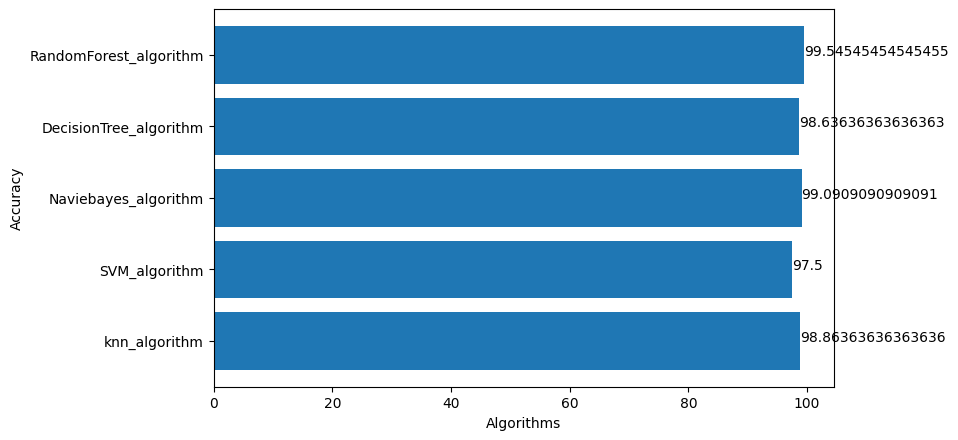

In [ ]:
plt.figure(figsize=[8,5],dpi = 100)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.barh(Names,Accuracy)
for index, value in enumerate(Accuracy):
    plt.text(value, index,str(value))
plt.show()

## **Building of Hybrid model**

In [ ]:
from sklearn.ensemble import VotingClassifier
estimators = []

model11 = RandomForestClassifier(max_depth = 3)
estimators.append(('rad1', model11))
model12 = RandomForestClassifier(max_depth = 4)
estimators.append(('rad2', model12))
model13 = RandomForestClassifier(max_depth = 5)
estimators.append(('rad3', model13))
model14 = RandomForestClassifier(max_depth = 2)
estimators.append(('rad4', model14))
model15 = RandomForestClassifier(max_depth = 3)
estimators.append(('rad5', model15))

model21 = DecisionTreeClassifier(max_depth = 3)
estimators.append(('cart1', model21))
model22 = DecisionTreeClassifier(max_depth = 4)
estimators.append(('cart2', model22))
model23 = DecisionTreeClassifier(max_depth = 5)
estimators.append(('cart3', model23))
model24 = DecisionTreeClassifier(max_depth = 2)
estimators.append(('cart4', model24))
model25 = DecisionTreeClassifier(max_depth = 3)
estimators.append(('cart5', model25))

model31 = GaussianNB()
estimators.append(('nbs1', model31))
model32 = GaussianNB()
estimators.append(('nbs2', model32))
model33 = GaussianNB()
estimators.append(('nbs3', model33))
model34 = GaussianNB()
estimators.append(('nbs4', model34))
model35 = GaussianNB()
estimators.append(('nbs5', model35))

model41 = SVC(kernel = 'linear')
estimators.append(('svm1', model41))
model42 = SVC(kernel = 'poly')
estimators.append(('svm2', model42))
model43 = SVC(kernel = 'rbf')
estimators.append(('svm3', model43))
model44 = SVC(kernel = 'rbf')
estimators.append(('svm4', model44))
model45 = SVC(kernel = 'linear')
estimators.append(('svm5', model45))

model51 = KNeighborsClassifier(n_neighbors = 5)
estimators.append(('knn1', model51))
model52 = KNeighborsClassifier(n_neighbors = 5)
estimators.append(('knn2', model52))
model53 = KNeighborsClassifier(n_neighbors = 6)
estimators.append(('knn3', model53))
model54 = KNeighborsClassifier(n_neighbors = 4)
estimators.append(('knn4', model54))
model55 = KNeighborsClassifier(n_neighbors = 5)
estimators.append(('knn5', model55))

ensemble = VotingClassifier(estimators)
ensemble.fit(X_train, Y_train)
y_pred = ensemble.predict(X_test)

## **Accuracy of Hybrid model**

In [ ]:
print(accuracy_score(Y_test,y_pred)*100)

98.63636363636363


# **Conclusion**

### As we can see top 2 accuracies are Random forest and Navie bayes we are going to predict using them

# **Importance of each feature**

In [ ]:
importance = pd.DataFrame({'Feature':X_train.columns,'Importance':np.round(random.feature_importances_,3)})
importance = importance.sort_values('Importance',ascending=False).set_index('Feature')
importance.head(10)

,Importance
Feature,
rainfall,0.225
humidity,0.213
K,0.180
P,0.157
N,0.106
temperature,0.066
ph,0.053


## **Prediction using a set of new data**

In [ ]:
data = np.array([[8,37, 40, 23.35905428, 83.53, 9.7, 106.91]])
prediction = random.predict(data)
print(prediction)

['pomegranate']



# **Testing the model**

In [ ]:
data=pd.read_csv('Crop_recommendation.csv')
data.head(5)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
data=data.drop(['ph','temperature'],axis=1)
data.head(5)

,N,P,K,humidity,rainfall,label
0,90,42,43,82.002744,202.935536,rice
1,85,58,41,80.319644,226.655537,rice
2,60,55,44,82.320763,263.964248,rice
3,74,35,40,80.158363,242.864034,rice
4,78,42,42,81.604873,262.717340,rice


In [ ]:
#df = pd.read_excel('DATASET.xlsx', sheet_name='Cotton')

In [ ]:
X = data.drop("label", axis=1)
Y = data["label"]

In [ ]:
df=pd.concat([pd.read_excel('DATASET.xlsx', sheet_name='Maize'),pd.read_excel('DATASET.xlsx', sheet_name='Mango'),pd.read_excel('DATASET.xlsx', sheet_name='Jute')])

In [ ]:
df

,N,P,K,humidity,rainfall,label
0,146,48,15,55,59,maize
1,101,60,17,61,97,maize
2,64,59,16,55,96,maize
3,73,41,17,64,67,maize
4,104,55,20,61,98,maize
...,...,...,...,...,...,...
494,60,45,35,71,187,jute
495,99,35,38,86,160,jute
496,86,47,42,84,169,jute
497,82,47,39,80,177,jute


In [ ]:
#Random forest classification
from sklearn.ensemble import RandomForestClassifier
random=RandomForestClassifier()
random.fit(X,Y)
r=random.predict(df.drop("label", axis=1))
RandomForest_accuracy=accuracy_score(df["label"],r)*100

In [ ]:
RandomForest_accuracy

77.9559118236473

In [ ]:
r

array(['maize', 'maize', 'maize', ..., 'jute', 'jute', 'rice'],
      dtype=object)

## **Testing using Hybrid model**

In [ ]:
ensemble1 = VotingClassifier(estimators)
ensemble1.fit(X,Y)
y_pred = ensemble1.predict(df.drop("label", axis=1))
print(accuracy_score(df["label"],y_pred)*100)

67.8690714762859
